 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
# Import of dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [8]:
# Reading whale returns
# Defining the file path
whale_returns_path = Path("../data/whale_returns.csv")

# Reading the CSV file into a DataFrame
whale_returns_df = pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Displaying the first few rows of the DataFrame to verify output
whale_returns_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


Null Counts:
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64


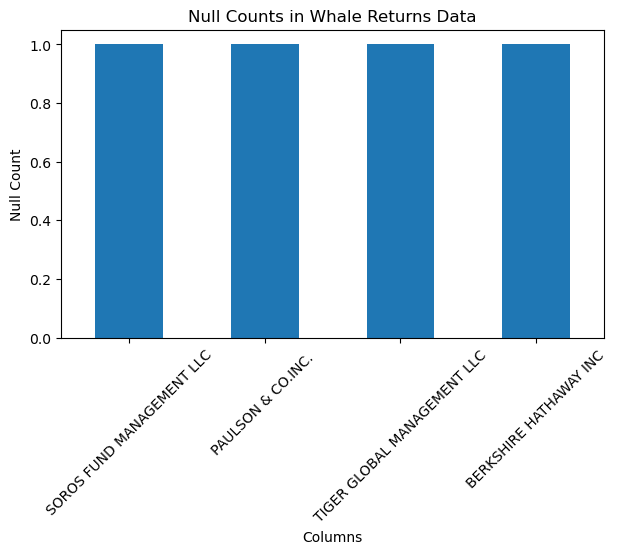

In [9]:
# Count nulls
# Counting available nulls
null_counts = whale_returns_df.isnull().sum()

# Printing results
print("Null Counts:")
print(null_counts)

# Ploting null counts
plt.figure(figsize=(7, 4))
null_counts.plot(kind='bar')
plt.title('Null Counts in Whale Returns Data')
plt.xlabel('Columns')
plt.ylabel('Null Count')
plt.xticks(rotation=45)
plt.show()


Null Counts after dropping nulls:
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


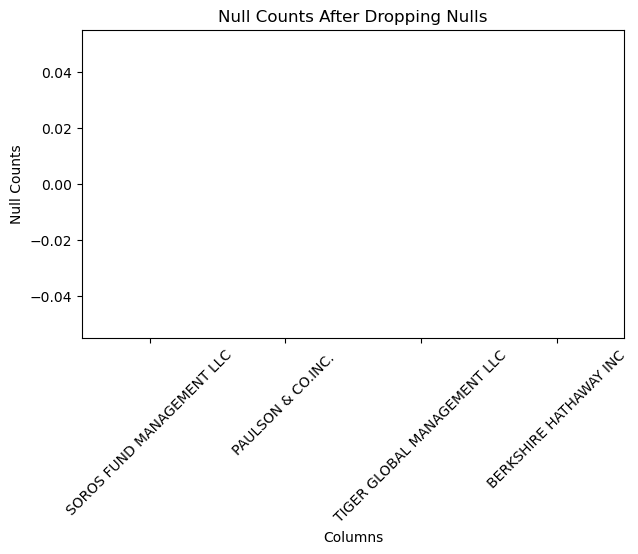

In [12]:
# Drop nulls
# Dropping nulls
whale_returns_df.dropna(inplace=True)

# Printing results
print("Null Counts after dropping nulls:")
print(whale_returns_df.isnull().sum())

# Ploting null counts
plt.figure(figsize=(7, 4))
whale_returns_df.isnull().sum().plot(kind='bar', color='skyblue')
plt.title('Null Counts After Dropping Nulls')
plt.xlabel('Columns')
plt.ylabel('Null Counts')
plt.xticks(rotation=45)
plt.show()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [14]:
# Reading algorithmic returns
# Reading the CSV file into a DataFrame
algo_returns_df = pd.read_csv("../data/algo_returns.csv", index_col="Date", parse_dates=True)

# Displaying the first 5 rows of the DataFrame
print(algo_returns_df.head())


              Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN


Null Counts - Algorithmic Returns:
Algo 1    0
Algo 2    6
dtype: int64


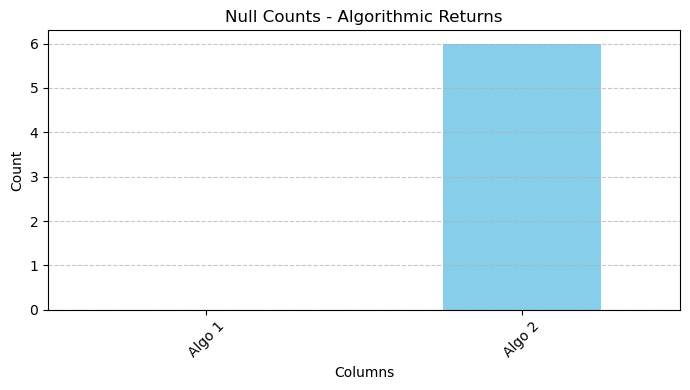

In [16]:
# Count nulls
# Counting nulls
null_counts_algo = algo_returns_df.isnull().sum()

# Printing results
print("Null Counts - Algorithmic Returns:")
print(null_counts_algo)

# Visualizing null counts
plt.figure(figsize=(7, 4))
null_counts_algo.plot(kind='bar', color='skyblue')
plt.title('Null Counts - Algorithmic Returns')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Null Counts - Algorithmic Returns after dropping nulls:
Algo 1    0
Algo 2    0
dtype: int64


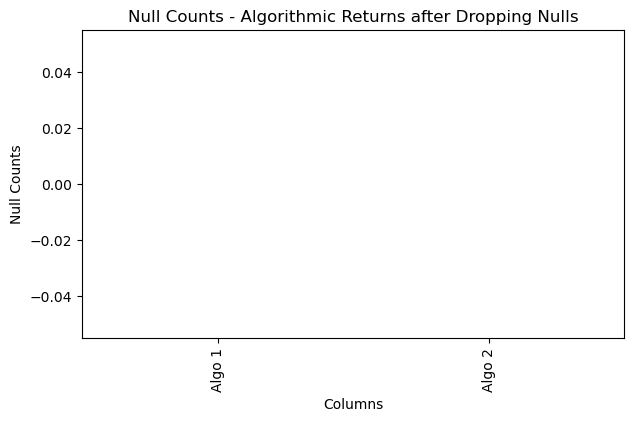

In [17]:
# Drop nulls
# Droping nulls
algo_returns_df.dropna(inplace=True)

# Printing results
print("Null Counts - Algorithmic Returns after dropping nulls:")
print(algo_returns_df.isnull().sum())

# Visualizing null counts after dropping
plt.figure(figsize=(7, 4))
algo_returns_df.isnull().sum().plot(kind='bar')
plt.title("Null Counts - Algorithmic Returns after Dropping Nulls")
plt.xlabel("Columns")
plt.ylabel("Null Counts")
plt.show()


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [18]:
# Reading S&P 500 Closing Prices
# Defining the file path
sp500_csv_path = Path("../data/sp500_history.csv")

# Reading the CSV file into a DataFrame
sp500_df = pd.read_csv(sp500_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)

# Displaying the first few rows of the DataFrame
print(sp500_df.head())


               Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06


In [19]:
# Check Data Types
# Checking the data types of the S&P 500 DataFrame
sp500_df.dtypes


Close    object
dtype: object

In [20]:
# Fix Data Types
# Removing the dollar signs and commas in the Close column
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').str.replace(',', '')

# Converting the Close column to a float
sp500_df['Close'] = sp500_df['Close'].astype(float)

# Confirming the data types have been fixed
print("Data Types:")
print(sp500_df.dtypes)


Data Types:
Close    float64
dtype: object


/var/folders/wq/yrwdfvsn52l4zzjxfytvq8300000gn/T/ipykernel_23304/937837318.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '').str.replace(',', '')


In [21]:
# Calculate Daily Returns
# Calculating daily returns
sp500_daily_returns = sp500_df['Close'].pct_change()

# Droping the first row since it will be NaN after calculating returns
sp500_daily_returns = sp500_daily_returns.dropna()

# Displaying the first few rows of the resulting DataFrame
sp500_daily_returns.head()


Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [23]:
# Drop nulls
# Droping nulls
sp500_daily_returns.dropna(inplace=True)

# Displaying the first few rows of the DataFrame
sp500_daily_returns.head()


Date
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
2019-04-15   -0.000509
Name: Close, dtype: float64

In [27]:
# Rename `Close` Column to be specific to this portfolio.
# Renaming the 'Close' column to 'SP500_Daily_Returns'
sp500_df.rename(columns={'Close': 'SP500_Daily_Returns'}, inplace=True)

# Displaying the DataFrame with both the dates and corresponding S&P 500 daily returns
print(sp500_df)


            SP500_Daily_Returns
Date                           
2019-04-23              2933.68
2019-04-22              2907.97
2019-04-18              2905.03
2019-04-17              2900.45
2019-04-16              2907.06
...                         ...
2012-10-05              1460.93
2012-10-04              1461.40
2012-10-03              1450.99
2012-10-02              1445.75
2012-10-01              1444.49

[1649 rows x 1 columns]


## Combine Whale, Algorithmic, and S&P 500 Returns

In [29]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Joining Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame
combined_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_df], axis='columns', join='inner')

# Displaying the first few rows of the combined DataFrame
combined_returns_df.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Daily_Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [57]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading CSV files
whale_returns_df = pd.read_csv('../data/whale_returns.csv', index_col='Date', parse_dates=True)
algo_returns_df = pd.read_csv('../data/algo_returns.csv', index_col='Date', parse_dates=True)
sp500_df = pd.read_csv('../data/sp500_history.csv', index_col='Date', parse_dates=True)

# Data Cleaning and Preprocessing
# Checking for missing values and handle if necessary

# Combining DataFrames if needed

# Printing basic information about the data
print("Whale Returns Data:")
print(whale_returns_df.info())

print("\nAlgorithmic Returns Data:")
print(algo_returns_df.info())

print("\nS&P 500 Data:")
print(sp500_df.info())


Whale Returns Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB
None

Algorithmic Returns Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB
None

S&P 500 Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data colum

In [59]:
# Readin the data from CSV files
whale_returns_df = pd.read_csv('../data/whale_returns.csv', index_col='Date', parse_dates=True)
algo_returns_df = pd.read_csv('../data/algo_returns.csv', index_col='Date', parse_dates=True)
sp500_df = pd.read_csv('../data/sp500_history.csv', index_col='Date', parse_dates=True)

# Printing data info to check if everything is correct
print("Whale Returns Data:")
print(whale_returns_df.info())
print("\nAlgorithmic Returns Data:")
print(algo_returns_df.info())
print("\nS&P 500 Data:")
print(sp500_df.info())

# Handling missing values
whale_returns_df.dropna(inplace=True)
algo_returns_df.dropna(inplace=True)
sp500_df.dropna(inplace=True)


Whale Returns Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB
None

Algorithmic Returns Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB
None

S&P 500 Data:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data colum

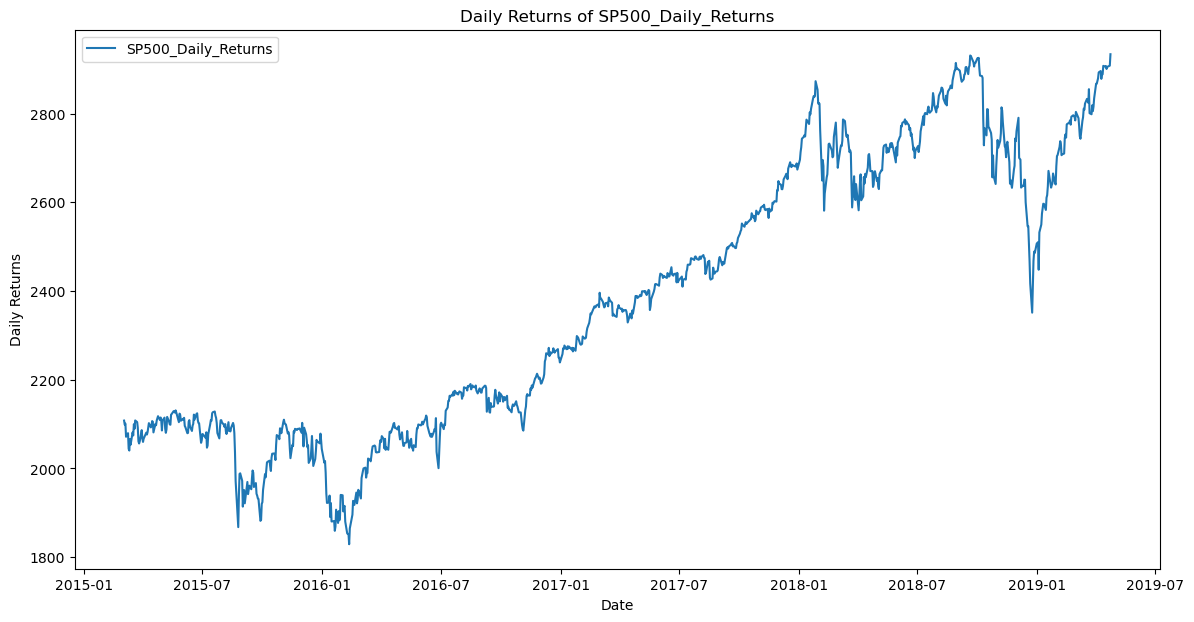

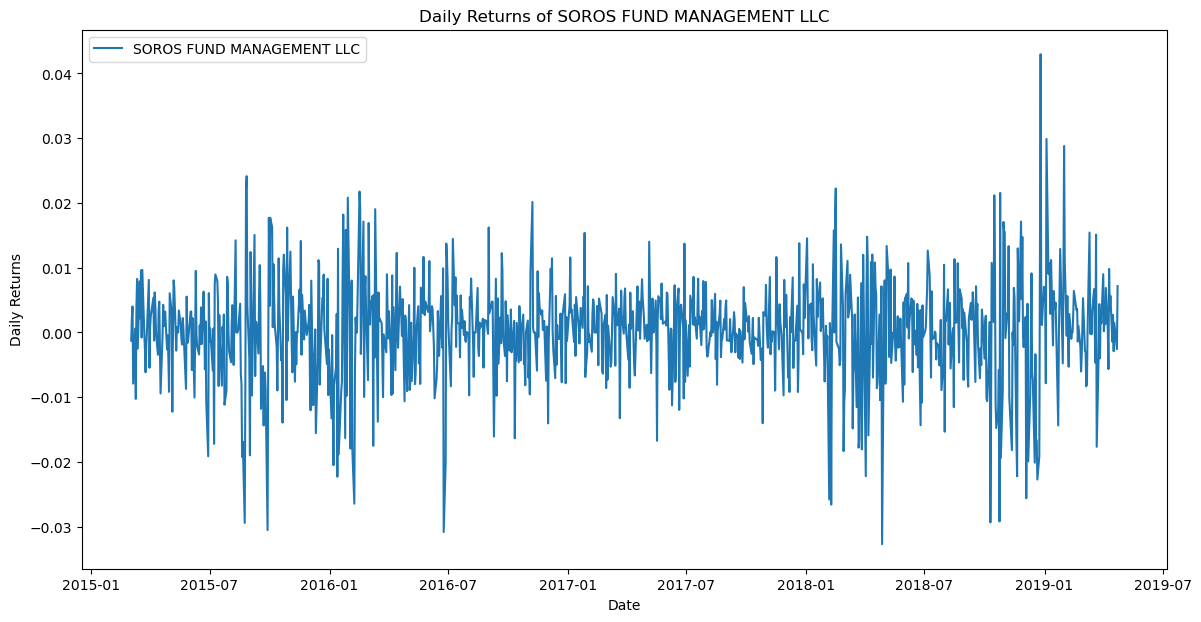

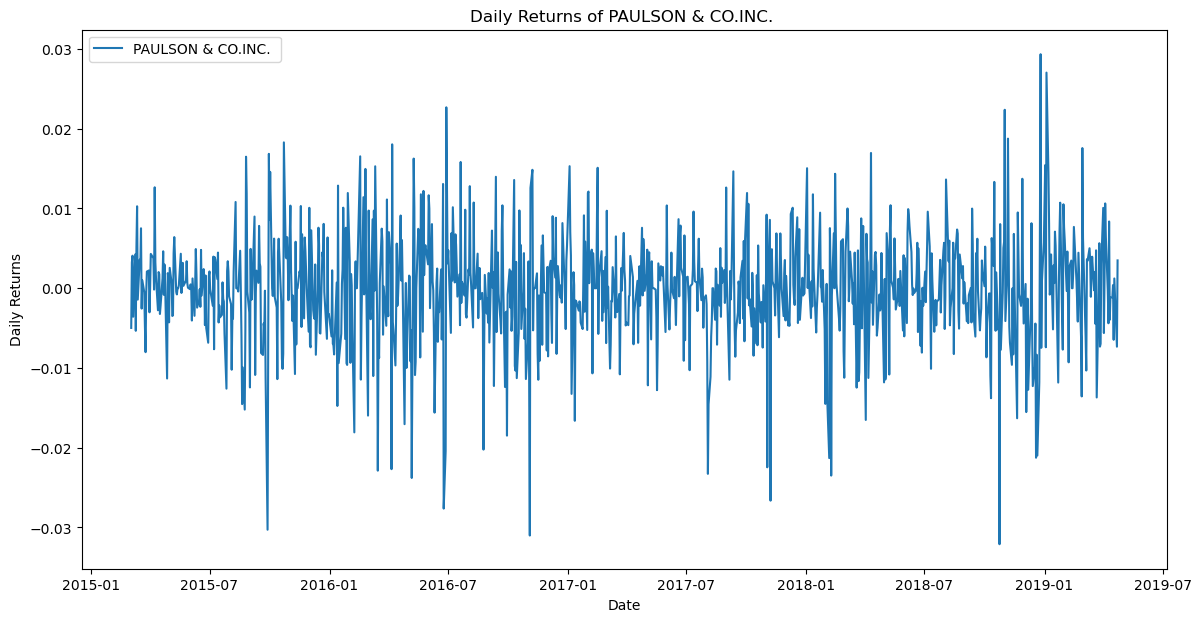

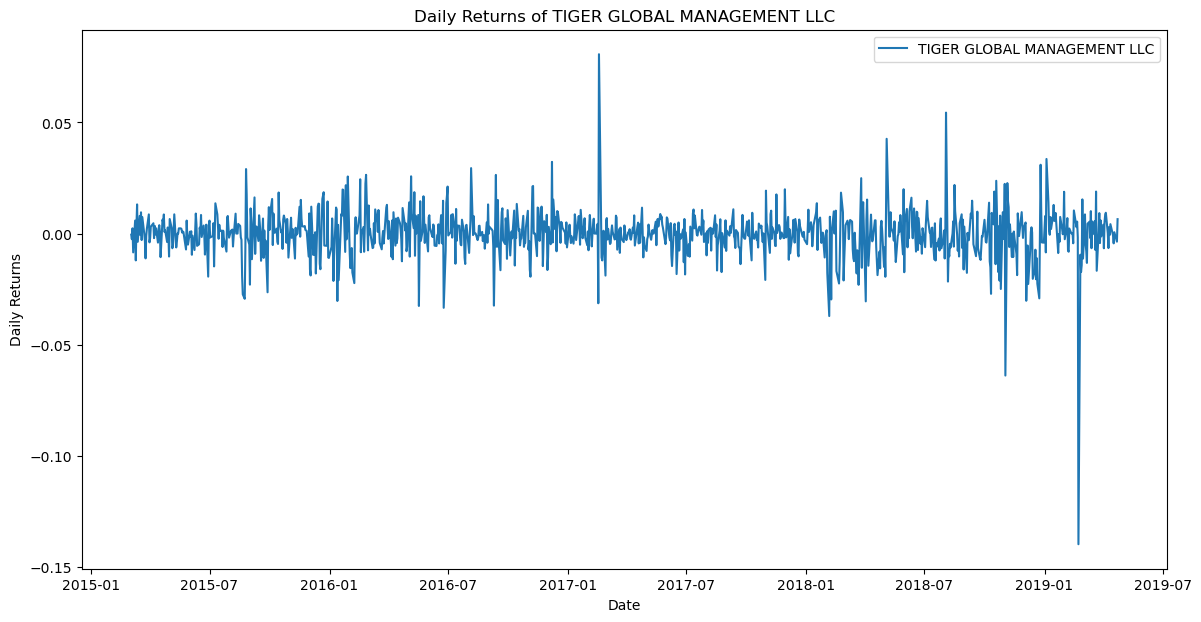

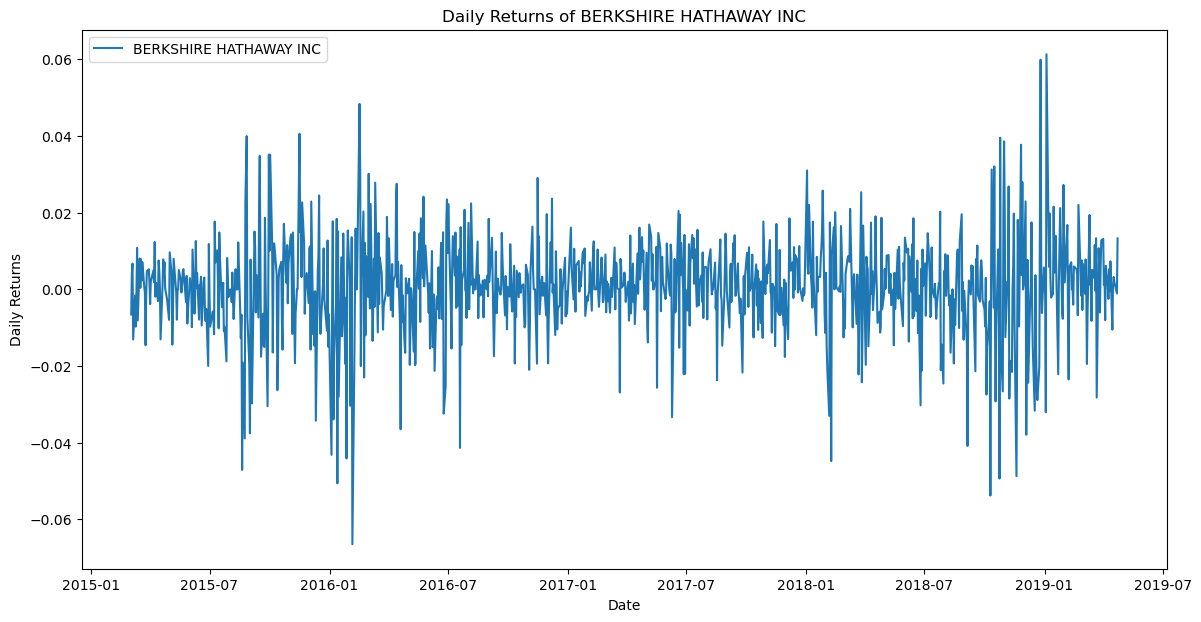

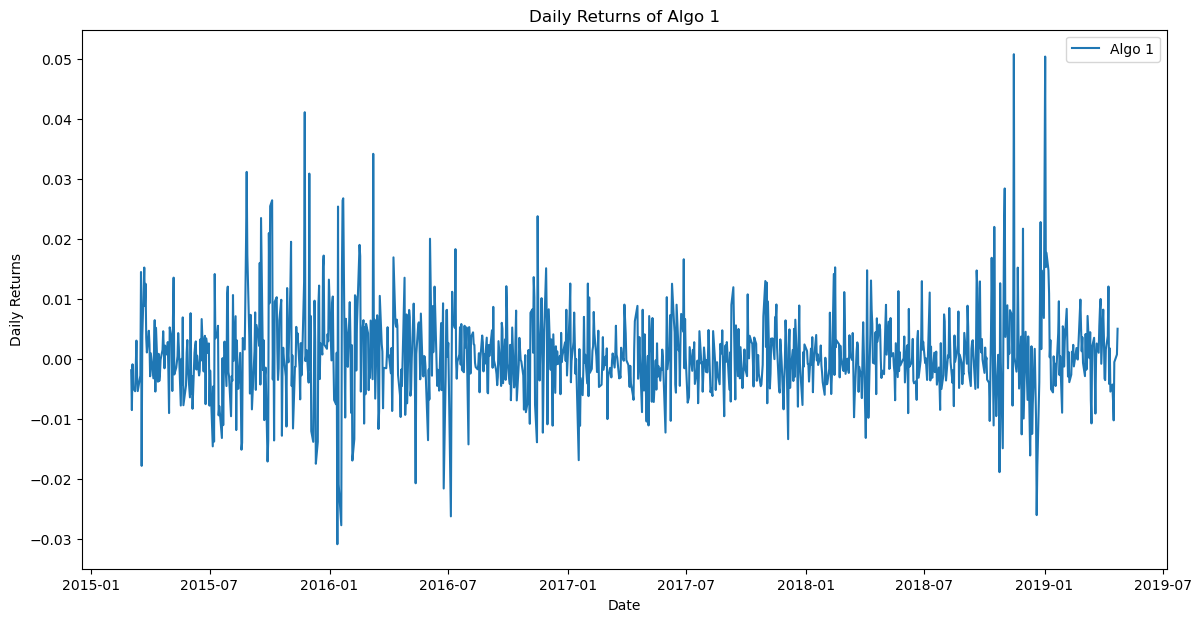

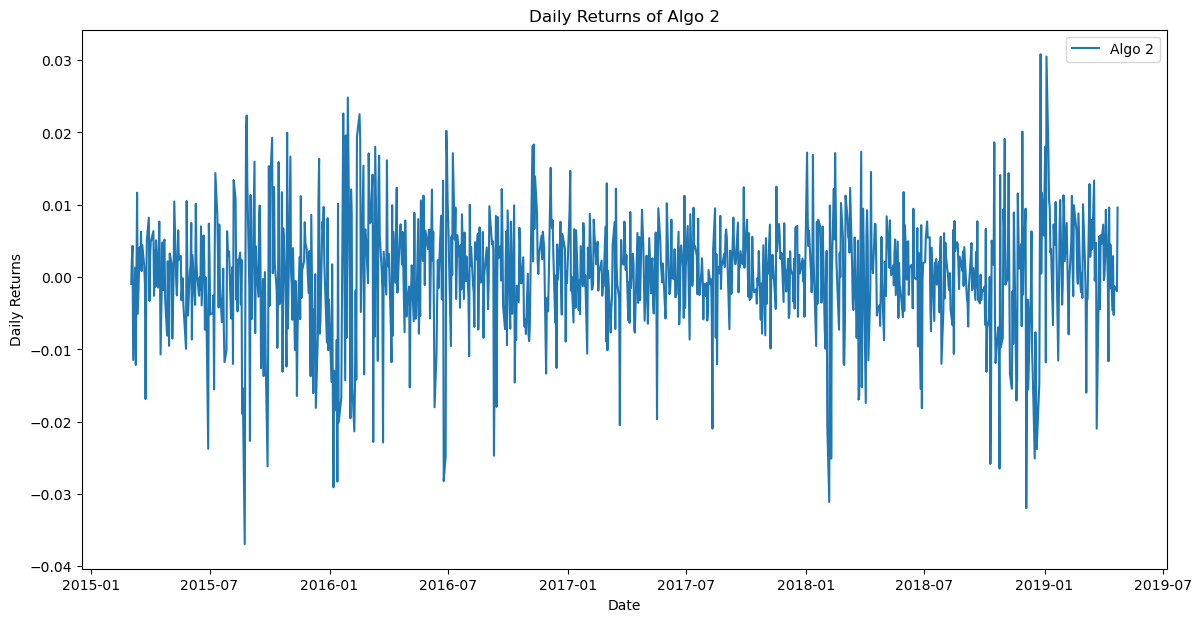

In [60]:
# Plot daily returns of all portfolios
# Defining a function to plot daily returns for each portfolio
def plot_portfolio_returns(df, portfolio_name):
    plt.figure(figsize=(14, 7))
    plt.plot(df.index, df[portfolio_name], label=portfolio_name)
    plt.title(f"Daily Returns of {portfolio_name}")
    plt.xlabel("Date")
    plt.ylabel("Daily Returns")
    plt.legend()
    plt.show()

# Ploting daily returns for each portfolio
for portfolio in selected_columns:
    plot_portfolio_returns(combined_returns_df, portfolio)


#### Calculate and Plot cumulative returns.

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


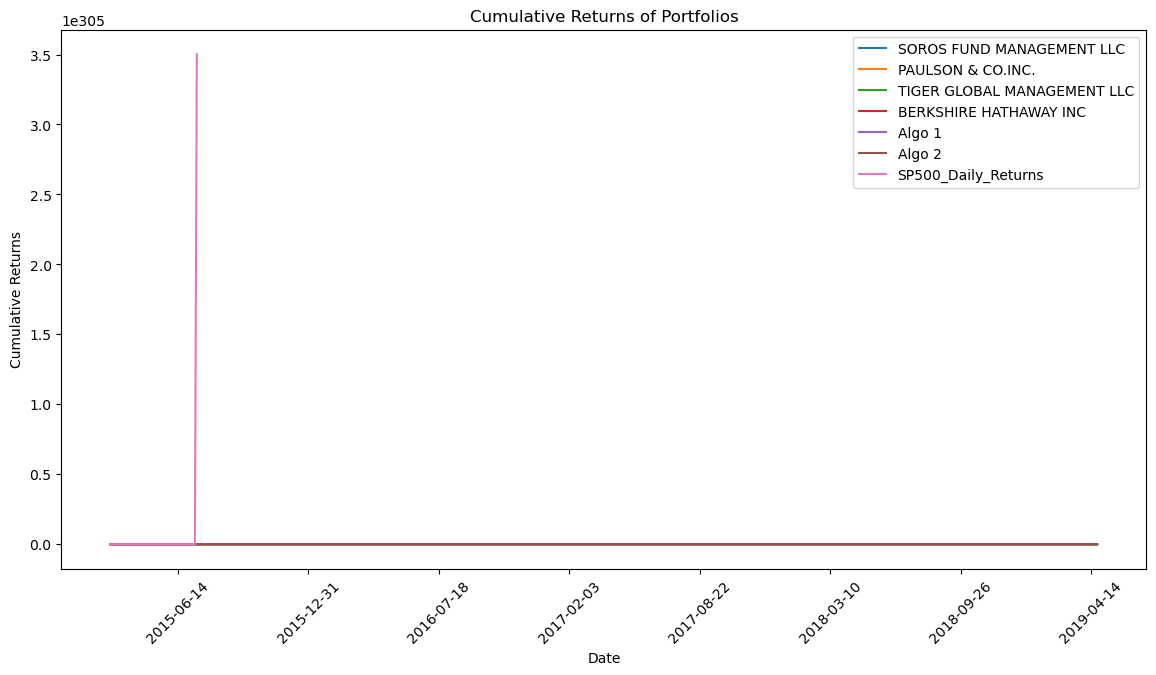

In [66]:
# Calculate cumulative returns of all portfolios
# Calculating cumulative returns of all portfolios
cumulative_returns_df = (1 + combined_returns_df).cumprod() - 1

# Plot cumulative returns
# Ploting cumulative returns
plt.figure(figsize=(14, 7))
for column in cumulative_returns_df.columns:
    plt.plot(cumulative_returns_df.index, cumulative_returns_df[column], label=column)

plt.title("Cumulative Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")

# Adjusting x-axis ticks
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Adjusting the number of ticks

plt.legend()
plt.show()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Figure size 1400x700 with 0 Axes>

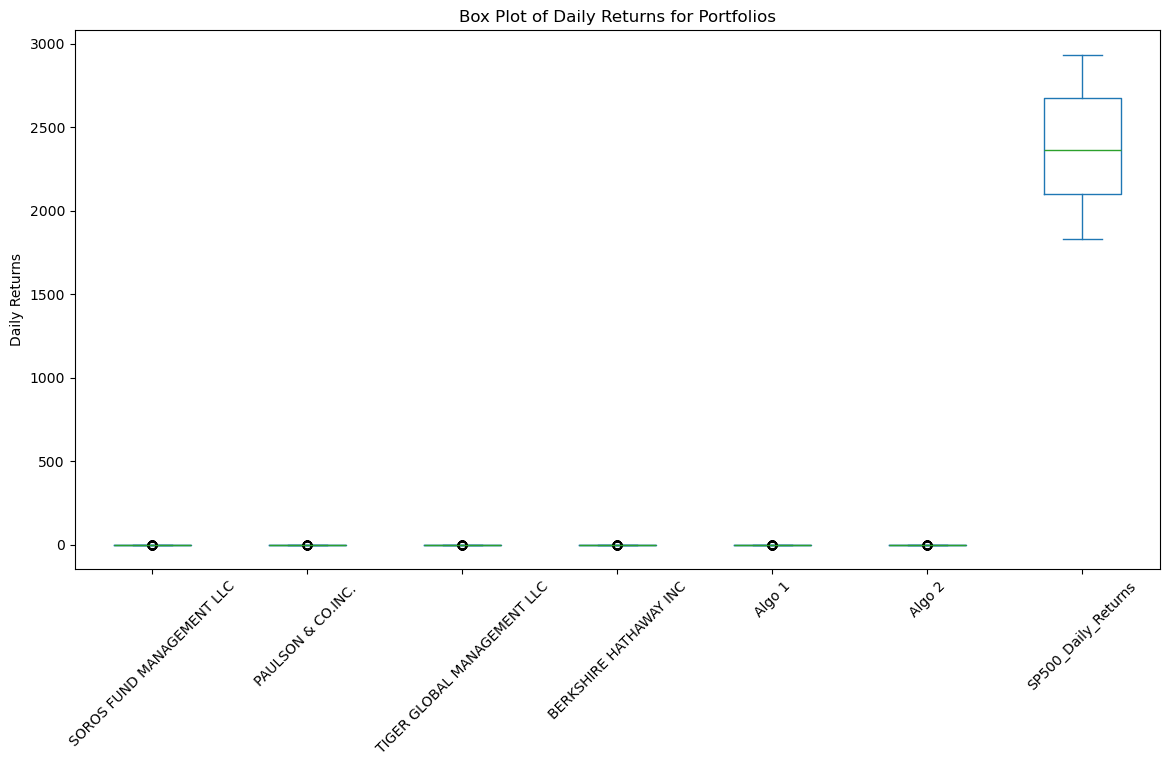

In [69]:
# Box plot to visually show risk
# Creating box plot to visually show risk
plt.figure(figsize=(14, 7))
combined_returns_df.plot(kind='box', figsize=(14,7))
plt.title("Box Plot of Daily Returns for Portfolios")
plt.ylabel("Daily Returns")

# Adjusting x-axis labels
plt.xticks(rotation=45)
plt.show()


### Calculate Standard Deviations

Daily Standard Deviations of Portfolios:
SOROS FUND MANAGEMENT LLC        0.007895
PAULSON & CO.INC.                0.007023
TIGER GLOBAL MANAGEMENT LLC      0.010894
BERKSHIRE HATHAWAY INC           0.012919
Algo 1                           0.007620
Algo 2                           0.008342
SP500_Daily_Returns            305.852115
dtype: float64


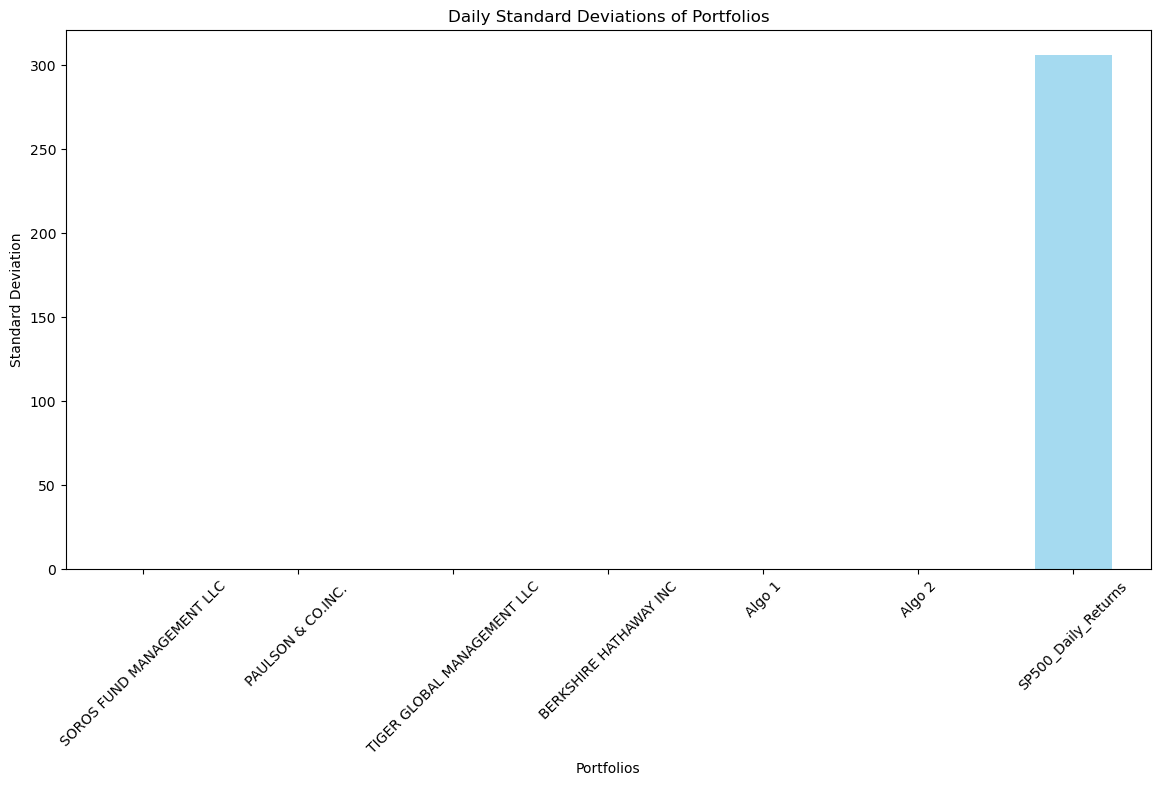

In [71]:
# Calculate the daily standard deviations of all portfolios
# Calculating and printing the daily standard deviations of all portfolios
daily_std_dev = combined_returns_df.std()
print("Daily Standard Deviations of Portfolios:")
print(daily_std_dev)

# Box plotting to visually show risk
plt.figure(figsize=(14, 7))
daily_std_dev.plot(kind='bar', color='skyblue', alpha=0.75)
plt.title('Daily Standard Deviations of Portfolios')
plt.xlabel('Portfolios')
plt.ylabel('Standard Deviation')

# Adjust x-axis labels
plt.xticks(rotation=45)
plt.show()


### Determine which portfolios are riskier than the S&P 500

Portfolios with Standard Deviation Higher than S&P 500:
Series([], dtype: float64)


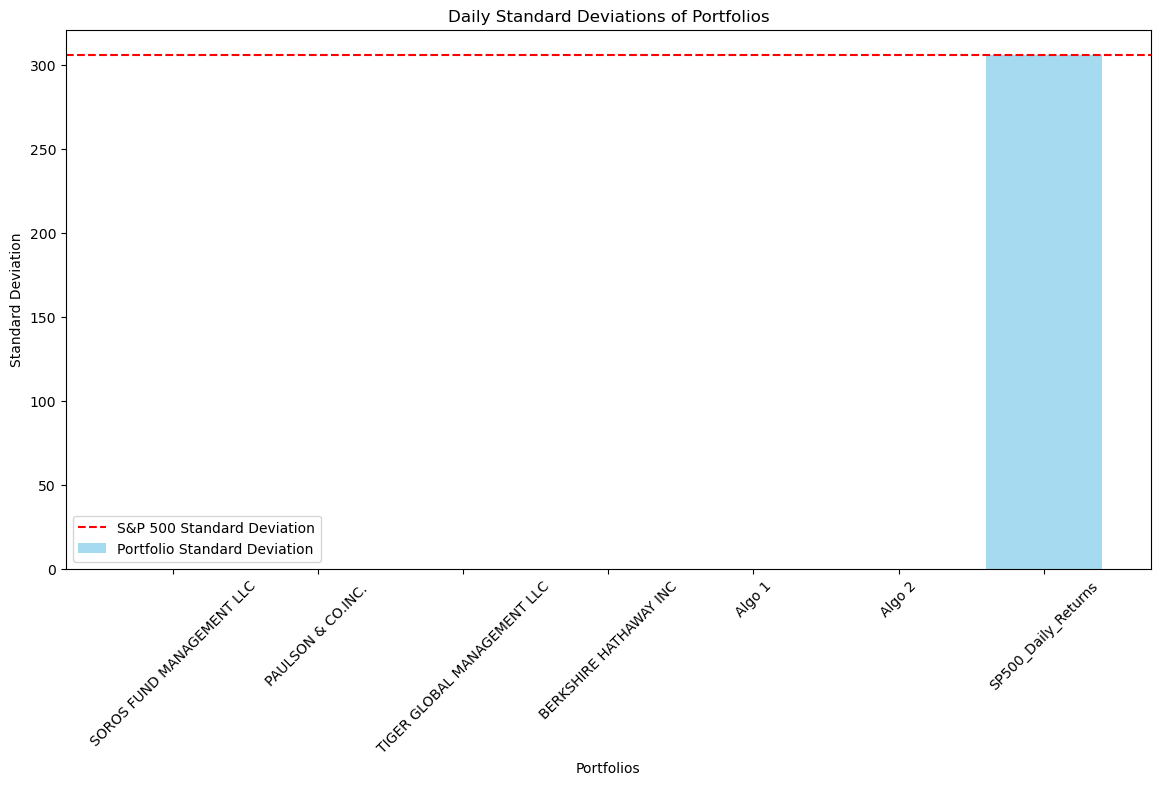

In [72]:
# Calculate  the daily standard deviation of S&P 500
# Calculating the daily standard deviation of S&P 500
sp500_daily_std = combined_returns_df['SP500_Daily_Returns'].std()

# Determine which portfolios are riskier than the S&P 500
# Determining which portfolios are riskier than the S&P 500
riskier_portfolios = daily_std_dev[daily_std_dev > sp500_daily_std]
print("Portfolios with Standard Deviation Higher than S&P 500:")
print(riskier_portfolios)

# Visualizing the comparison
plt.figure(figsize=(14, 7))
plt.bar(daily_std_dev.index, daily_std_dev, color='skyblue', alpha=0.75, label='Portfolio Standard Deviation')
plt.axhline(y=sp500_daily_std, color='red', linestyle='--', label='S&P 500 Standard Deviation')
plt.title('Daily Standard Deviations of Portfolios')
plt.xlabel('Portfolios')
plt.ylabel('Standard Deviation')

# Adjusting x-axis labels
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)
# Calculating the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std_dev * np.sqrt(252)
print("Annualized Standard Deviations of Portfolios:")
print(annualized_std_dev)


Annualized Standard Deviations of Portfolios:
SOROS FUND MANAGEMENT LLC         0.125335
PAULSON & CO.INC.                 0.111488
TIGER GLOBAL MANAGEMENT LLC       0.172936
BERKSHIRE HATHAWAY INC            0.205077
Algo 1                            0.120967
Algo 2                            0.132430
SP500_Daily_Returns            4855.251803
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

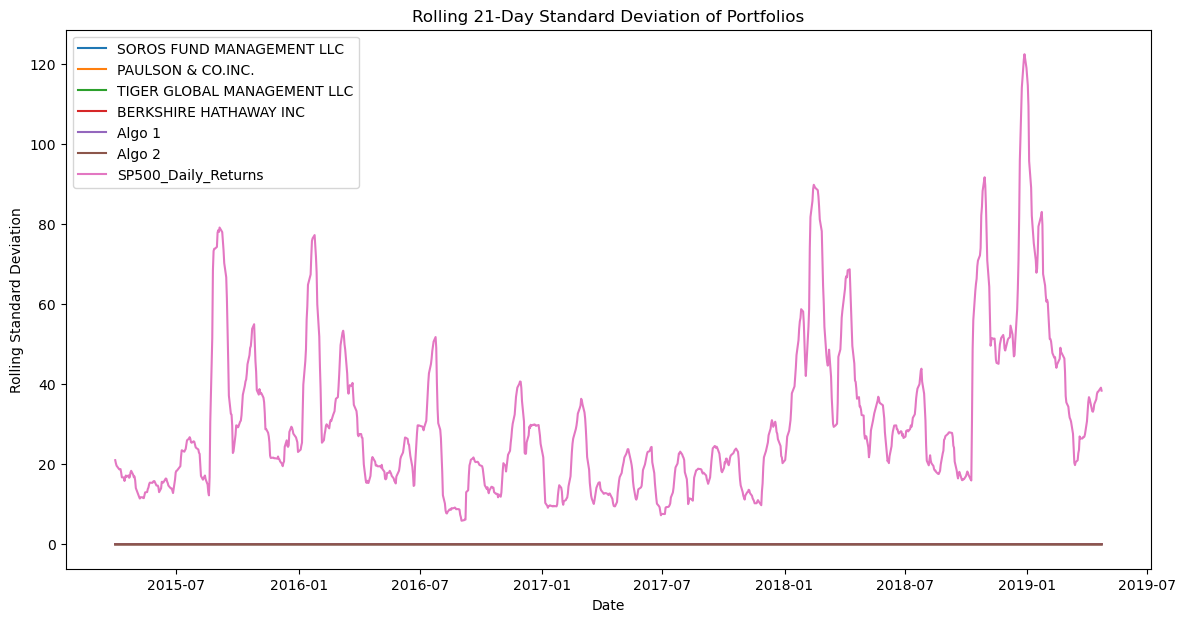

In [80]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Calculating the rolling standard deviation for all portfolios with a 21-day window
rolling_std = combined_returns_df.rolling(window=21).std()

# Plot the rolling standard deviation
# Ploting the rolling standard deviation
plt.figure(figsize=(14, 7))
for column in combined_returns_df.columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)

plt.title("Rolling 21-Day Standard Deviation of Portfolios")
plt.xlabel("Date")
plt.ylabel("Rolling Standard Deviation")
plt.legend()
plt.show()


### Calculate and plot the correlation

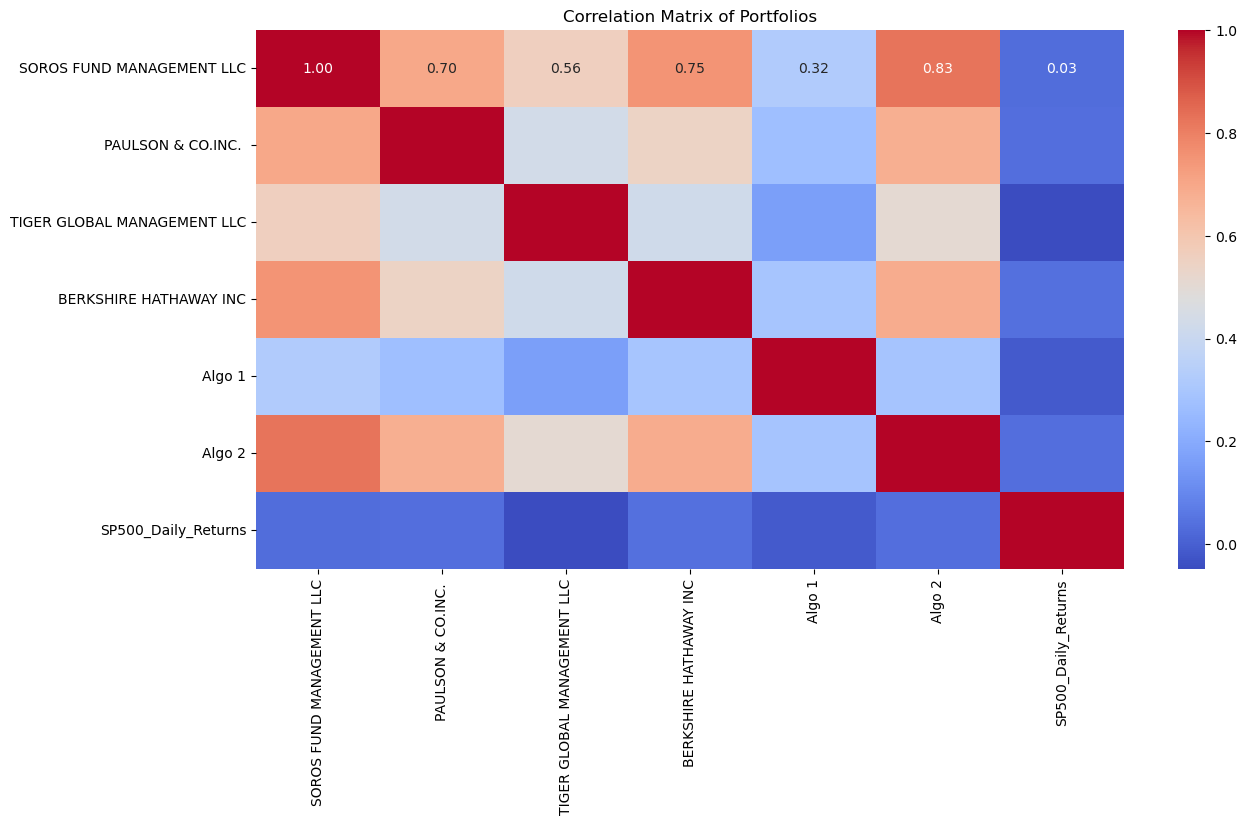

In [84]:
# Import seaborn library
import seaborn as sns

# Calculate the correlation
# Calculating the correlation matrix
correlation_matrix = combined_returns_df.corr()

# Display de correlation matrix
# Displaying the correlation matrix
plt.figure(figsize=(14, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Portfolios")
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

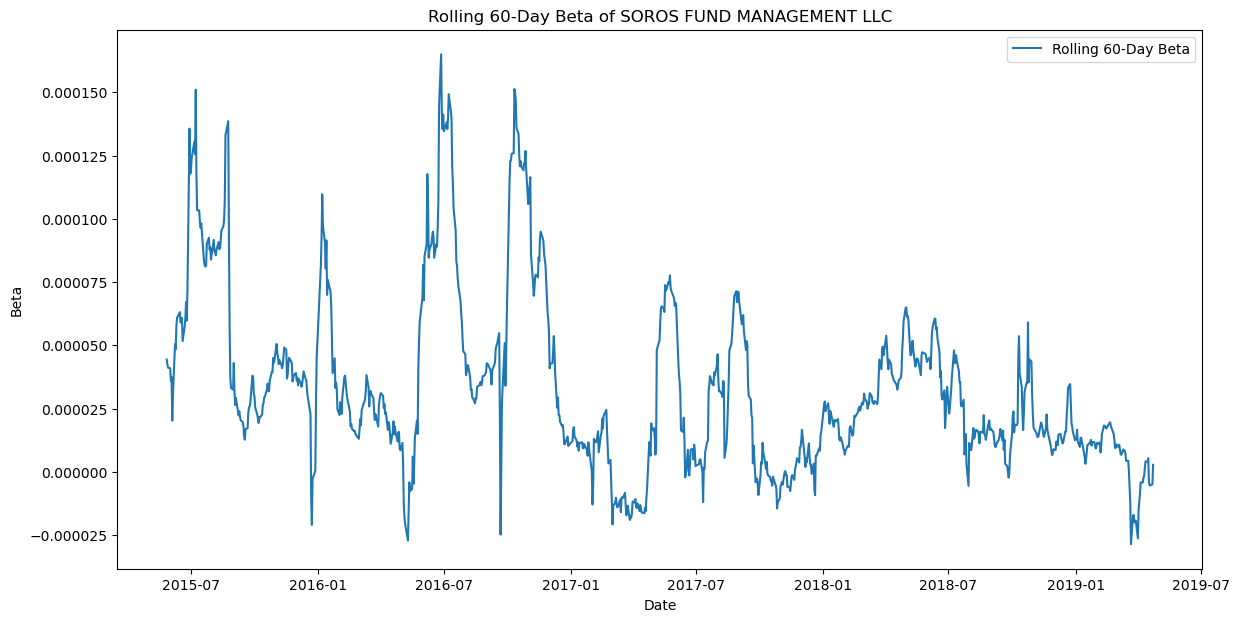

In [85]:
# Calculate covariance of a single portfolio
# Calculating covariance of a single portfolio with S&P 500
covariance = combined_returns_df['SOROS FUND MANAGEMENT LLC'].cov(combined_returns_df['SP500_Daily_Returns'])

# Calculate variance of S&P 500
# Calculating variance of S&P 500
sp500_variance = combined_returns_df['SP500_Daily_Returns'].var()

# Compute beta
# Computing beta
beta = covariance / sp500_variance

# Plot beta trend
# Plotting beta trend
rolling_covariance = combined_returns_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_returns_df['SP500_Daily_Returns'])
rolling_variance = combined_returns_df['SP500_Daily_Returns'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance

plt.figure(figsize=(14, 7))
plt.plot(rolling_beta.index, rolling_beta, label='Rolling 60-Day Beta')
plt.title("Rolling 60-Day Beta of SOROS FUND MANAGEMENT LLC")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

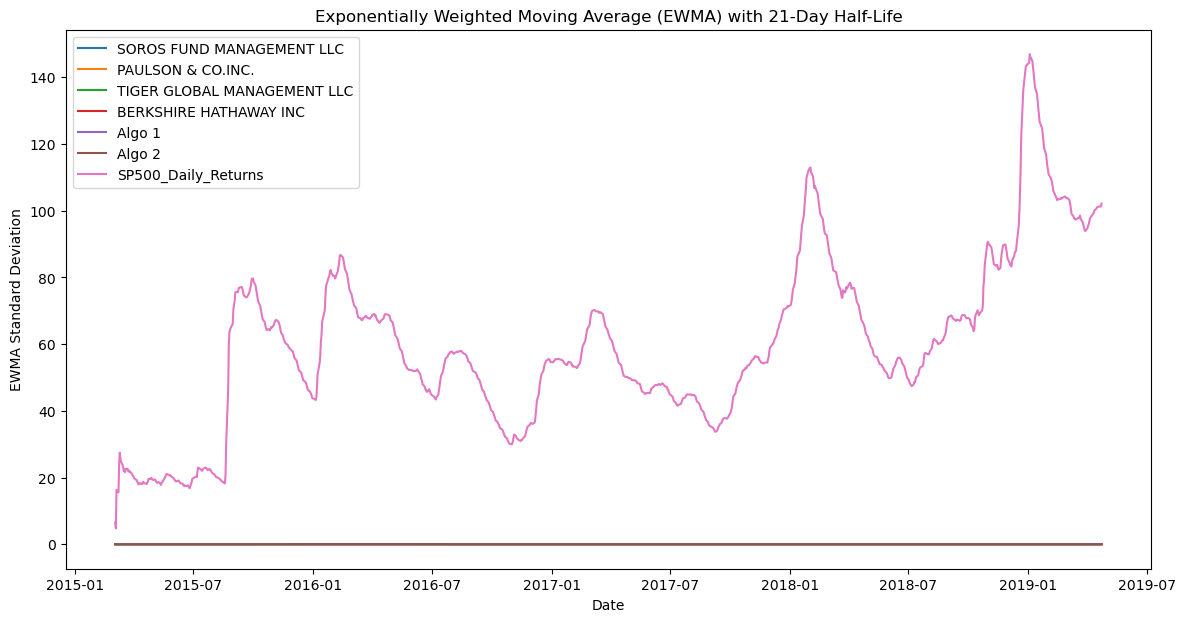

In [86]:
# Use `ewm` to calculate the rolling window
# Calculating exponentially weighted moving average (EWMA) with a 21-day half-life for each portfolio
ewma_std = combined_returns_df.ewm(halflife=21).std()

# Plotting EWMA for each portfolio
plt.figure(figsize=(14, 7))
for column in combined_returns_df.columns:
    plt.plot(ewma_std.index, ewma_std[column], label=column)

plt.title("Exponentially Weighted Moving Average (EWMA) with 21-Day Half-Life")
plt.xlabel("Date")
plt.ylabel("EWMA Standard Deviation")
plt.legend()
plt.show()


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [90]:
# Annualized Sharpe Ratios
# Calculating Sharpe ratios
sharpe_ratios = (combined_returns_df.mean() * 252) / (combined_returns_df.std() * np.sqrt(252))

# Printing Sharpe ratios
print("Sharpe Ratios:")
print(sharpe_ratios)


Sharpe Ratios:
SOROS FUND MANAGEMENT LLC        0.356417
PAULSON & CO.INC.               -0.483570
TIGER GLOBAL MANAGEMENT LLC     -0.121060
BERKSHIRE HATHAWAY INC           0.621810
Algo 1                           1.378648
Algo 2                           0.501364
SP500_Daily_Returns            123.476112
dtype: float64


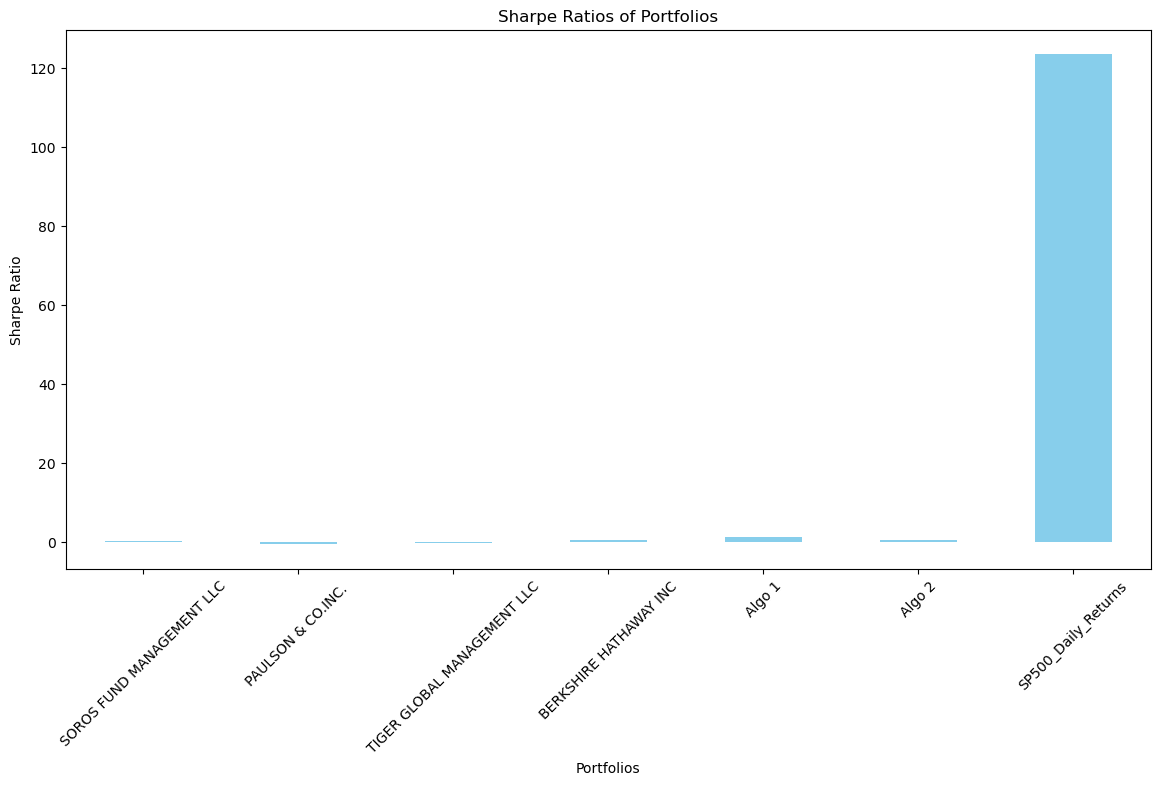

In [89]:
# Visualize the sharpe ratios as a bar plot
# Visualizing Sharpe ratios
plt.figure(figsize=(14, 7))
sharpe_ratios.plot(kind='bar', color='skyblue')
plt.title('Sharpe Ratios of Portfolios')
plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.xticks(rotation=45)
plt.show()


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Based on the Sharpe ratios calculated:

- Algo 1 has a Sharpe ratio of 1.378648.
- Algo 2 has a Sharpe ratio of 0.501364.
- S&P 500 has a Sharpe ratio of 123.476112.

Comparing these ratios:
- Algo 1 has a higher Sharpe ratio than both Algo 2 and the S&P 500, indicating superior risk-adjusted returns.
- Algo 2 also outperforms the S&P 500 in terms of risk-adjusted returns, but to a lesser extent compared to Algo 1.
- The Sharpe ratio of the S&P 500 is extremely high, likely indicating an issue with the calculation.

In conclusion, both algorithmic strategies (Algo 1 and Algo 2) appear to outperform both the market (S&P 500) and the whale portfolios in terms of risk-adjusted returns. However, further investigation may be needed to verify the accuracy of the S&P 500 Sharpe ratio, as it seems unusually high.


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!